# CPSC6300 - Final Project: KKBox-Music Recommendation System
# Author: Wenkang Wei, ShuLe Zhu

# Outline of KKBox-Music Recommendation System 
Here is an outline of the project, the project will discuss following sections
## Motivation
A recommendation system is a subclass of an information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.
In Music Recommendation System, due to the fact that there are millions of musics, composers, artist and other information, it is hard for users to pick the musics they like from millions of songs and remember which songs they like and want to re-play. Hence it is necessary to build a music recommendation system to recommend musics, which users prefer and are likely to repeat listening to.

## Goal of this project
In this project, we are going to build a recommendation system to predict the chances of a user listening to a song repetitively after the first observable listening event within a time window was triggered. If there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, its target is marked 1, and 0 otherwise in the training set. The same rule applies to the testing set.

## Platform
We run this notebook in Google Colab. Please read this reference to see how to download kaggle data to google colab https://www.kaggle.com/general/74235

You can run the codes with some modifications, like changing root path in Kaggle platform as well

## 0. Data Collection and Description
**Two Ways to download dataset:** Google Drive, Kaggle resource

**Descriptions of dataset:**

1. train.csv
    + msno: user id
    + song_id: song id
    + source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
    + source_screen_name: name of the layout a user sees.
    + source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
    + target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .
    
 
2. test.csv
    + id: row id (will be used for submission)
    + msno: user id
    + song_id: song id
    + source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
    + source_screen_name: name of the layout a user sees.
    + source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.

3. sample_submission.csv
    + sample submission file in the format that we expect you to submit
    + id: same as id in test.csv
    + target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .
    
    
4. songs.csv
    The songs. Note that data is in unicode.

    + song_id
    + song_length: in ms
    + genre_ids: genre category. Some songs have multiple genres and they are separated by |
    + artist_name
    + composer
    + lyricist
    + language
    
    
5. members.csv
    user information.
    + msno
    + city
    + bd: age. Note: this column has outlier values, please use your judgement.
    + gender
    + registered_via: registration method
    + registration_init_time: format %Y%m%d
    + expiration_date: format %Y%m%d

6. song_extra_info.csv
    + song_id
    + song name - the name of the song.
    + isrc - International Standard Recording Code, theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.

## 1. Exploratory Data Analysis (EDA)
In data exploratory data analysis, we will do the following visualization and analysis to exploret the relationship between attributes:

+ Find the Description and summary of each CSV file and determine Null object, categorical attributes, numerical attributes
+ Analyze Song information
  - Plot and visualize the count of song genres, composers, artists
  - Plot and visualize the count of source types, source screen names, system tabs with target as hue axis
   
+ Analyze Member information
  - visualize the count of bd/age attribute

+ Analyze correlation between different attributes using heatmap plot

+ Plot bivariate plots to visualize and analyze relationship between attributes, like city and age/bd, expiration date and target.


## 2. Data Preprocessing 
**Note that** This section is to give some examples to preprocess data like filling missing values and removing outliers. 

**To train models directly, we start from step 3 data ETL to extract and transform data directly using integrated functions**

+ Convert String datetime data to datetime format and separate year, month, day as new features

+ Remove the outliers

+ Filling missing values

+ Transform and add new features

+ Convert features from object type into categorical type.

## 3. Data Pipeline: Extract, Transformation, Load (ETL) 
**Please Note that since RAM memory is small (only 12GB), to avoid the program crashes, You may need to directly start from Step 3 (ETL) to clean and transform data and train model later.**


## 4. Machine Learning Modeling
+ **Task**

+ **Loss Function**

+ **Evaluation Metric**  

+ **Light Gradient Boosting machines (LGBM) model**

+ **Wide and Deep Neural network model**

## 5. Model Training and validation

## 6. Model Evaluation

## 7. Report and Conclusion


.

.

# 0. Data Collection

In [1]:
# create directory to store data
!mkdir -p ./kaggle/

## Method 1: Download data from my Google Drive directly (Recommended)
This method requires we use a tool called. **gdown**
If you have not install it, please install it first by command line:  

**pip install gdown**

In [4]:
# url to dataset in Google Drive: https://drive.google.com/file/d/1-WJHZUWFtz9ksfvFoX-dc-ZKjZ6fTk0D/view?usp=sharing
! gdown --id 1-WJHZUWFtz9ksfvFoX-dc-ZKjZ6fTk0D
! unzip kkbox-dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1-WJHZUWFtz9ksfvFoX-dc-ZKjZ6fTk0D
To: /content/kkbox-dataset.zip
362MB [00:03, 101MB/s]
Archive:  kkbox-dataset.zip
replace members.csv.7z? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv.7z? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Method 2: Dowload data from kaggle website. **(Please Skip this, if you choose Method 1)**
This method requires you to download and upload API token, a file called kaggle.json from your kaggle account first.

Please refer to this tutorial https://www.kaggle.com/general/74235


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle

If using Method2 to download dataset, please make sure you download kaggle.json API token from your kaggle account to current directory.

In [3]:
# Copy kaggle.json file to current directory

# Note: Please modify this command to upload your own kaggle.json file !

!cp /content/drive/My\ Drive/Colab\ Notebooks/KKBox-MusicRecommendationSystem/kaggle.json .


# !!chmod 600 kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!mkdir -p ./kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle  competitions download kkbox-music-recommendation-challenge


!du -h *.csv.7z

kaggle.json
 93% 92.0M/98.8M [00:03<00:00, 16.9MB/s]
100% 98.8M/98.8M [00:03<00:00, 27.8MB/s]
 96% 97.0M/101M [00:05<00:00, 10.3MB/s]
100% 101M/101M [00:05<00:00, 20.0MB/s] 
 96% 97.0M/101M [00:03<00:00, 11.0MB/s]
100% 101M/101M [00:03<00:00, 28.2MB/s] 
 79% 33.0M/41.9M [00:02<00:01, 6.29MB/s]
100% 41.9M/41.9M [00:02<00:00, 15.3MB/s]
  0% 0.00/453k [00:00<?, ?B/s]
100% 453k/453k [00:00<00:00, 63.1MB/s]
  0% 0.00/1.29M [00:00<?, ?B/s]
100% 1.29M/1.29M [00:00<00:00, 86.2MB/s]
1.3M	members.csv.7z
456K	sample_submission.csv.7z
99M	song_extra_info.csv.7z
101M	songs.csv.7z
42M	test.csv.7z
102M	train.csv.7z


## Use 7z to uncompress the csv data files

In [3]:
!mkdir kaggle/working
!mkdir kaggle/working/train
!mkdir kaggle/working/train/data
!apt-get install p7zip
!apt-get install p7zip-full 
!7za e members.csv.7z 
!7za e songs.csv.7z 
!7za e song_extra_info.csv.7z 
!7za e train.csv.7z 
!7za e sample_submission.csv.7z 
!7za e test.csv.7z 
!mv *.csv kaggle/working/train/data

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip is already the newest version (16.02+dfsg-6).
p7zip set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1349856 bytes (1319 KiB)

Extracting archive: members.csv.7z
--
Path = members.csv.7z
Type = 7z
Physical Size = 1349856
Headers Size = 130
Method = LZMA2:3m
Solid = -
Blocks = 1

  0%    Everything is Ok

Size:       2503827
Compressed: 1349856

7-Zip

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
!ls ./kaggle/working/train/data/

members.csv	       song_extra_info.csv  test.csv
sample_submission.csv  songs.csv	    train.csv


In [6]:
!du -h ./kaggle/working/train/data/

1.7G	./kaggle/working/train/data/


In [7]:
#import necessary packages here
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

np.random.seed(2020)

# 1. Exploratory Data Analysis

In [8]:
root = './kaggle/working/train/data/'
# !ls ../input/kkbox-music-recommendation-challenge
train_df = pd.read_csv(root+ "train.csv")
test_df = pd.read_csv(root+ "test.csv")
song_df = pd.read_csv(root+ "songs.csv")
song_extra_df = pd.read_csv(root+ "song_extra_info.csv")
members_df = pd.read_csv(root+ "members.csv")
# sample_df = pd.read_csv(root+ "sample_submission.csv")


## 1.1 Take a look to the info and format of training set and testing set

### Information of training set

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [ ]:
train_df.count()

msno                  7377418
song_id               7377418
source_system_tab     7352569
source_screen_name    6962614
source_type           7355879
target                7377418
dtype: int64

We can see that attributes: source_system_tab, source_screen_name, source_type contain missing values above. An example dataframe of training set is as follow:

In [ ]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


### Information of testing set

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [ ]:
test_df.count()

id                    2556790
msno                  2556790
song_id               2556790
source_system_tab     2548348
source_screen_name    2393907
source_type           2549493
dtype: int64

In test dataset,  We can see that attributes that contain missing values: 
1. source_system_tab
2. source_screen_name
3. source_type 

In [ ]:
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


### Information of Song data

In [ ]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [ ]:
song_df.count()

song_id        2296320
song_length    2296320
genre_ids      2202204
artist_name    2296320
composer       1224966
lyricist        351052
language       2296319
dtype: int64

### Attributes in song data that contain missing values are following:
1. composer
2. lyricist
3. genre_ids
4. language

In [ ]:
song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
print("Unique Song amount in trainset:",train_df['song_id'].nunique())
print("Unique Song amount in testset:", test_df['song_id'].nunique())
print("Unique Song amount in song list:",song_df['song_id'].nunique())

Unique Song amount in trainset: 359966
Unique Song amount in testset: 224753
Unique Song amount in song list: 2296320


### Information of song extra data

In [ ]:
song_extra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [ ]:
song_extra_df.count()

song_id    2295971
name       2295969
isrc       2159423
dtype: int64

In [ ]:
song_extra_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


### Information of member data

In [ ]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


## 1.2 Explore Song information

In [ ]:
# Merge two dataframe based on song_id so that we can analyze the song information together with training data

user_music_df = train_df.merge(song_df,on='song_id',how="left", copy =False)
user_music_df["song_id"] = user_music_df["song_id"].astype("category")
user_music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0


### Number of unique values in song_id, genre_id

In [ ]:
user_music_df['song_id'].nunique(), user_music_df['genre_ids'].nunique()

(359966, 572)

### Count of not None values in each attribute

In [ ]:
user_music_df.count()

msno                  7377418
song_id               7377418
source_system_tab     7352569
source_screen_name    6962614
source_type           7355879
target                7377418
song_length           7377304
genre_ids             7258963
artist_name           7377304
composer              5701712
lyricist              4198620
language              7377268
dtype: int64

### Visualize the counts of song genres

Text(0.5, 0, 'Count')

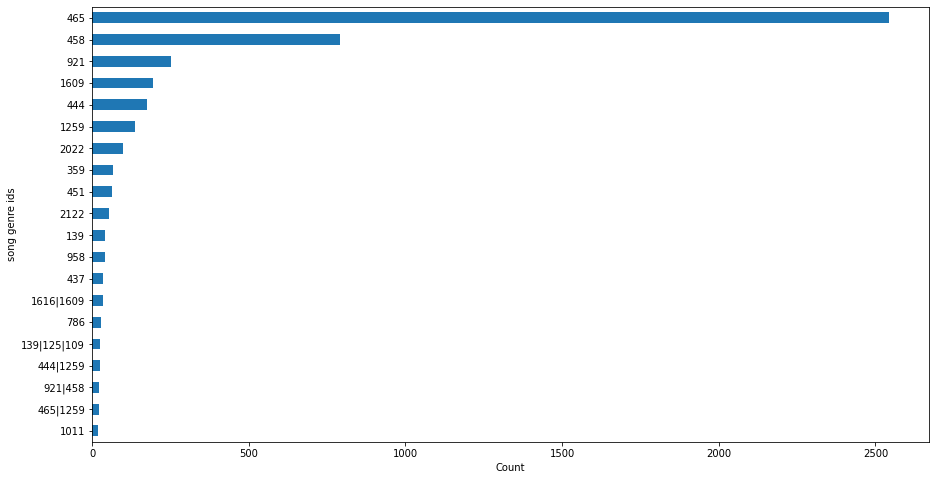

In [ ]:
# plot the top-20 frequent genre_ids 
df_genre = user_music_df.sample(n=5000)
df_genre = df_genre["genre_ids"].value_counts().sort_values(ascending=False)[:20]
df_genre = df_genre.sort_values(ascending=True)
ax  = df_genre.plot.barh(figsize=(15,8))
ax.set_ylabel("song genre ids")
ax.set_xlabel("Count")


### Visualize the count of artists

Text(0.5, 0, 'Count')

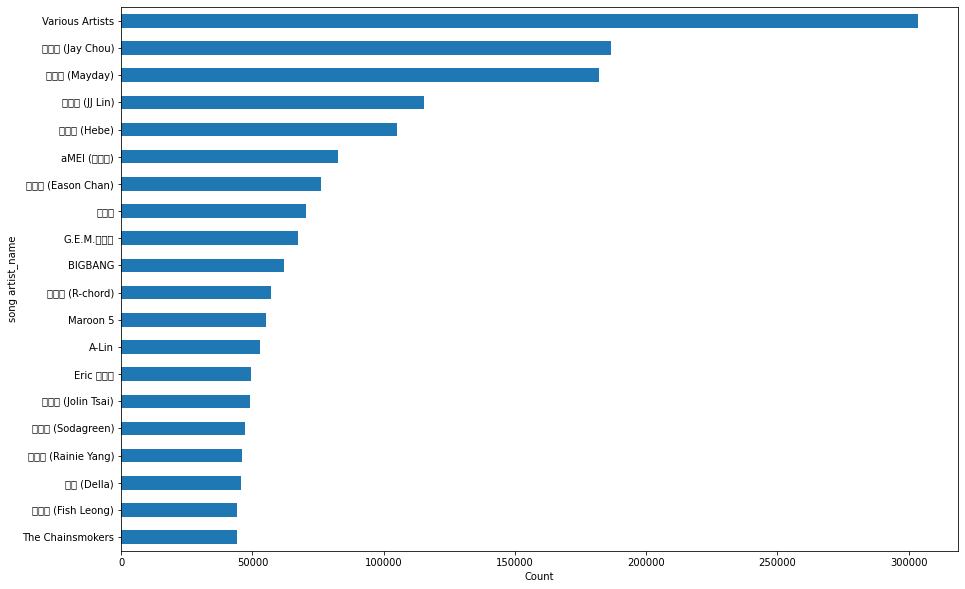

In [ ]:

#selec the top-20 frequent artist_name
df_artist = user_music_df["artist_name"].value_counts().sort_values(ascending=False)[:20]
#plot in descending order in horizonal direction
df_artist = df_artist.sort_values(ascending=True)
ax  = df_artist.plot.barh(figsize=(15,10))
ax.set_ylabel("song artist_name")
ax.set_xlabel("Count")


# artist_name    
# composer       
# lyricist 

In [ ]:
df_artist.head(10)

The Chainsmokers     44215
梁靜茹 (Fish Leong)     44290
丁噹 (Della)           45762
楊丞琳 (Rainie Yang)    46006
蘇打綠 (Sodagreen)      47177
蔡依林 (Jolin Tsai)     49055
Eric 周興哲             49426
A-Lin                52913
Maroon 5             55151
謝和弦 (R-chord)        57040
Name: artist_name, dtype: int64

### Visualize the count of song composers

Text(0, 0.5, 'Count')

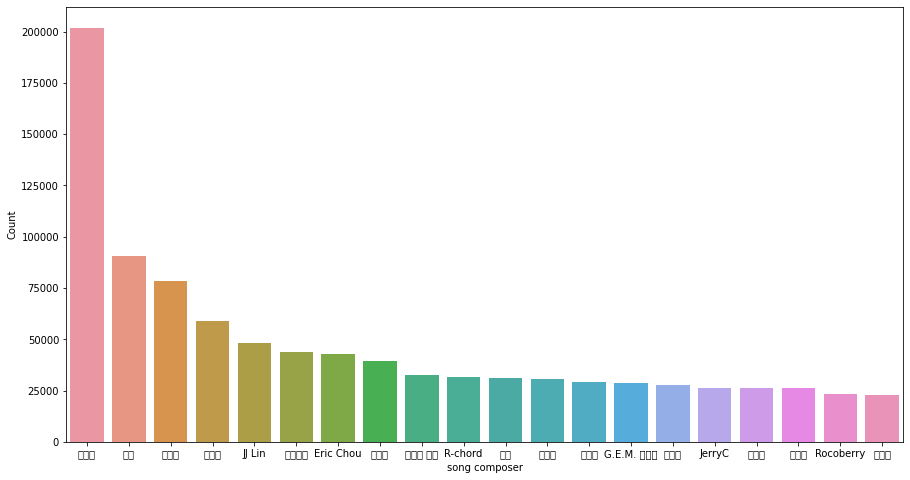

In [ ]:

fig, ax = plt.subplots(1, figsize=(15,8))
df_composer = user_music_df["composer"].value_counts().sort_values(ascending=False)[:20]
ax  = sns.barplot([i for i in df_composer.index],df_composer,ax= ax)
ax.set_xlabel("song composer")
ax.set_ylabel("Count")

In [ ]:
df_composer.head(20).index

Index(['周杰倫', '阿信', '林俊傑', '陳皓宇', 'JJ Lin', '張簡君偉', 'Eric Chou', '韋禮安',
       '八三夭 阿璞', 'R-chord', '怪獸', '吳青峰', '周湯豪', 'G.E.M. 鄧紫棋', '陳小霞', 'JerryC',
       '吳克群', '薛之謙', 'Rocoberry', '李榮浩'],
      dtype='object')

**Analysis:** we can see that features: counts of composer, artist, song genres are all long tail distribution. Most of users prefer the songs from particular composers, artists and song genres

### Analyse the relationship between target and song

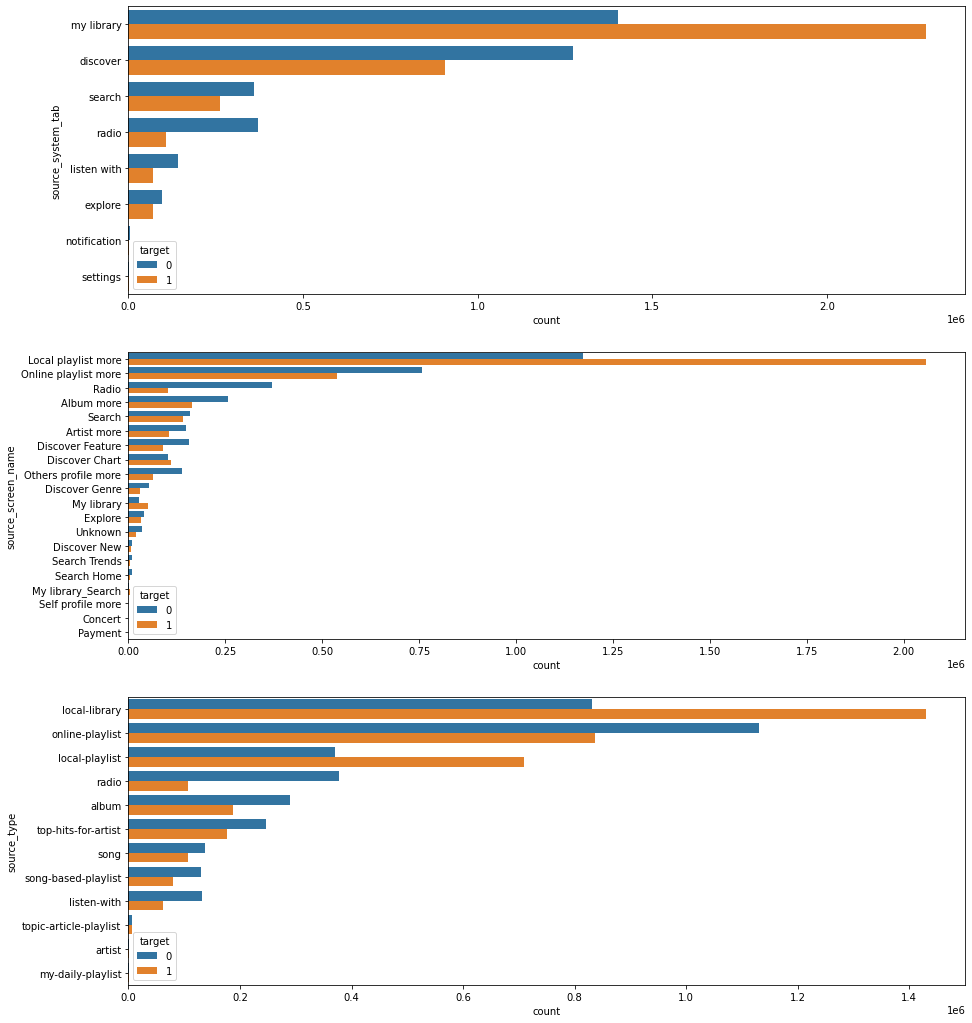

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(15,18))
# df = user_music_df[['source_system_tab','source_screen_name','source_type']]
# df['source_system_tab'].value_counts().plot.bar(rot=20,ax=ax[0])
# ax[0].set_xlabel("source_system_tab")
# ax[0].set_ylabel("count")

# df['source_screen_name'].value_counts().plot.bar(rot=30,ax=ax[1])
# ax[1].set_xlabel("source_screen_name")
# ax[1].set_ylabel("count")


# df['source_type'].value_counts().plot.bar(rot=20,ax=ax[2])
# ax[2].set_xlabel("source_type")
# ax[2].set_ylabel("count")

sns.countplot(y= 'source_system_tab',hue='target',
              order = user_music_df['source_system_tab'].value_counts().index,
              data=user_music_df,dodge=True, ax= ax[0])

sns.countplot(y= 'source_screen_name',hue='target',
              order = user_music_df['source_screen_name'].value_counts().index,
              data=user_music_df,dodge=True, ax= ax[1])


sns.countplot(y= 'source_type',hue='target',
              order = user_music_df['source_type'].value_counts().index,
              data=user_music_df,dodge=True, ax= ax[2])

**Analysis:** We can see that local library and local playlist are the main sources that users repeat playing music and Most of users more prefer to play music from local library than to play music online

### Check the information of member data

In [ ]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [ ]:
members_df["registration_init_time"] = pd.to_datetime(members_df["registration_init_time"], format="%Y%m%d")
members_df["expiration_date"] = pd.to_datetime(members_df["expiration_date"], format="%Y%m%d")

### Parse the datetime data

In [ ]:
members_df["registration_init_day"] = members_df["registration_init_time"].dt.day
members_df["registration_init_month"] = members_df["registration_init_time"].dt.month
members_df["registration_init_year"] = members_df["registration_init_time"].dt.year
members_df["expiration_day"] = members_df["expiration_date"].dt.day
members_df["expiration_month"] = members_df["expiration_date"].dt.month
members_df["expiration_year"] = members_df["expiration_date"].dt.year
members_df = members_df.drop(columns = ["registration_init_time", "expiration_date"],axis=1)
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   msno                     34403 non-null  object
 1   city                     34403 non-null  int64 
 2   bd                       34403 non-null  int64 
 3   gender                   14501 non-null  object
 4   registered_via           34403 non-null  int64 
 5   registration_init_day    34403 non-null  int64 
 6   registration_init_month  34403 non-null  int64 
 7   registration_init_year   34403 non-null  int64 
 8   expiration_day           34403 non-null  int64 
 9   expiration_month         34403 non-null  int64 
 10  expiration_year          34403 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.9+ MB


### Merge member data with training data

In [ ]:
member_music_df = user_music_df.merge(members_df,on='msno',how="left", copy=False)

#after merging, the axis used to merge becomes object type,so need to convert it back to category type
member_music_df["msno"] = member_music_df["msno"].astype("category")
member_music_df["song_id"] = member_music_df["song_id"].astype("category")
member_music_df.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,2,1,2012,5,10,2017
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,25,5,2011,11,9,2017
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,25,5,2011,11,9,2017
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,25,5,2011,11,9,2017
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,2,1,2012,5,10,2017


In [ ]:
member_music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 22 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   msno                     category
 1   song_id                  category
 2   source_system_tab        object  
 3   source_screen_name       object  
 4   source_type              object  
 5   target                   int64   
 6   song_length              float64 
 7   genre_ids                object  
 8   artist_name              object  
 9   composer                 object  
 10  lyricist                 object  
 11  language                 float64 
 12  city                     int64   
 13  bd                       int64   
 14  gender                   object  
 15  registered_via           int64   
 16  registration_init_day    int64   
 17  registration_init_month  int64   
 18  registration_init_year   int64   
 19  expiration_day           int64   
 20  expiration_month        

In [ ]:
member_music_df.count()

msno                       7377418
song_id                    7377418
source_system_tab          7352569
source_screen_name         6962614
source_type                7355879
target                     7377418
song_length                7377304
genre_ids                  7258963
artist_name                7377304
composer                   5701712
lyricist                   4198620
language                   7377268
city                       7377418
bd                         7377418
gender                     4415939
registered_via             7377418
registration_init_day      7377418
registration_init_month    7377418
registration_init_year     7377418
expiration_day             7377418
expiration_month           7377418
expiration_year            7377418
dtype: int64

In [ ]:
member_music_df['bd'].describe()

count    7.377418e+06
mean     1.753927e+01
std      2.155447e+01
min     -4.300000e+01
25%      0.000000e+00
50%      2.100000e+01
75%      2.900000e+01
max      1.051000e+03
Name: bd, dtype: float64

### Visualize distribution of age: bd attribution
Note: Since this attribute has outliers, I use remove the data that lies outside range [0,100] by replacing them with NaN

Text(0, 0.5, 'count')

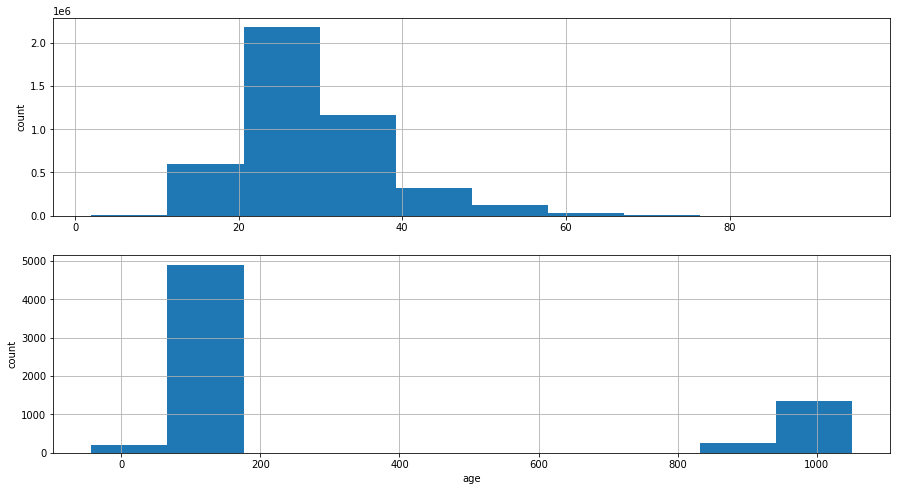

In [ ]:
fig, ax = plt.subplots(2, figsize= (15,8))
age_df = member_music_df['bd'].loc[(member_music_df['bd']>0) & (member_music_df['bd']<100)]
age_df.hist(ax = ax[0])

ax[0].set_ylabel("count")

member_music_df['bd'].loc[(member_music_df['bd']<0) | (member_music_df['bd']>100)].hist(ax = ax[1])
ax[1].set_xlabel("age")
ax[1].set_ylabel("count")

**Analysis:** We can see that bd/age column has outliers outside range [0,100], so we want to replace the incorrect bd with NaN

In [ ]:
member_music_df['bd'].loc[(member_music_df['bd']<=0) | (member_music_df['bd']>=100)]= np.nan

### Check the correlation between attributes using correlation matrix and visualize them wiht heatmap

In [ ]:
member_music_df.describe()

,target,song_length,language,city,bd,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year
count,7.377418e+06,7.377304e+06,7.377268e+06,7.377418e+06,4.430216e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06
mean,5.035171e-01,2.451210e+05,1.860933e+01,7.511399e+00,2.872200e+01,6.794068e+00,1.581532e+01,6.832306e+00,2.012741e+03,1.562338e+01,8.341742e+00,2.017072e+03
std,4.999877e-01,6.734471e+04,2.117681e+01,6.641625e+00,8.634326e+00,2.275774e+00,8.768549e+00,3.700723e+00,3.018861e+00,9.107235e+00,2.511360e+00,3.982536e-01
min,0.000000e+00,1.393000e+03,-1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.970000e+03
25%,0.000000e+00,2.147260e+05,3.000000e+00,1.000000e+00,2.300000e+01,4.000000e+00,8.000000e+00,3.000000e+00,2.011000e+03,8.000000e+00,9.000000e+00,2.017000e+03
50%,1.000000e+00,2.418120e+05,3.000000e+00,5.000000e+00,2.700000e+01,7.000000e+00,1.600000e+01,7.000000e+00,2.013000e+03,1.500000e+01,9.000000e+00,2.017000e+03
75%,1.000000e+00,2.721600e+05,5.200000e+01,1.300000e+01,3.300000e+01,9.000000e+00,2.300000e+01,1.000000e+01,2.015000e+03,2.300000e+01,1.000000e+01,2.017000e+03
max,1.000000e+00,1.085171e+07,5.900000e+01,2.200000e+01,9.500000e+01,1.300000e+01,3.100000e+01,1.200000e+01,2.017000e+03,3.100000e+01,1.200000e+01,2.020000e+03


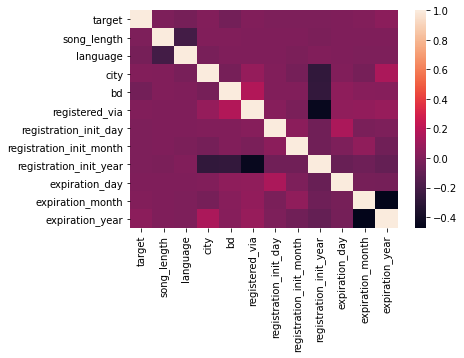

In [ ]:
#dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
#Any na values are automatically excluded. For any non-numeric data type columns in the data frame it is ignored.
corr_matrix = member_music_df.corr()
_ = sns.heatmap(corr_matrix)


**Analysis:** From the correlation matrix above, it is hard for us to see which attributes are most related to target as the correlation values of target are very similar.In this case, we choose to use all features to train models later

It seems like registration_init_year is negatively correlative to bd/age, city, registered_via. Song_length is also negatively correlative to language.


In [ ]:
#print the top threee attributes that have the strongest correlation with "Target" and the corresponding correlation coefficients.
corr = corr_matrix['target'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")
#print the top threee attributes that have the strongest correlation with "song_length" and the corresponding correlation coefficients.
corr = corr_matrix['song_length'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")
#print the top threee attributes that have the strongest correlation with "language" and the corresponding correlation coefficients.
corr = corr_matrix['language'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")
#print the top threee attributes that have the strongest correlation with "city" and the corresponding correlation coefficients.
corr = corr_matrix['city'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")
#print the top threee attributes that have the strongest correlation with "bd" and the corresponding correlation coefficients.
corr = corr_matrix['bd'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")
#print the top threee attributes that have the strongest correlation with "registered_via" and the corresponding correlation coefficients.
corr = corr_matrix['registered_via'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")
corr = corr_matrix['registration_init_day'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")
corr = corr_matrix['registration_init_month'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")
corr = corr_matrix['registration_init_year'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")
corr = corr_matrix['expiration_day'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")
corr = corr_matrix['expiration_month'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")
corr = corr_matrix['expiration_year'].sort_values(ascending= False)
for x in corr.index[1:4].to_list():
    print("{} {}".format(x, corr[x]))
print("")



expiration_year 0.042248332355979766
city 0.01211438566189457
expiration_month 0.011817072086387569

bd 0.009861302779254176
city 0.005184912771179072
expiration_year 0.00457185870016758

registration_init_year 0.009070490482763404
registration_init_day 0.001510510575428178
bd 0.001107978394135987

expiration_year 0.15014690465127595
registered_via 0.0737556175747622
target 0.01211438566189457

registered_via 0.1753390015877422
expiration_day 0.056335854806629254
expiration_month 0.032935904360496926

bd 0.1753390015877422
expiration_year 0.08413460079453493
city 0.0737556175747622

expiration_day 0.1493505099924221
registration_init_month 0.04443692475737983
registered_via 0.02554331305533987

expiration_month 0.056911114419175665
registration_init_day 0.04443692475737983
bd 0.005399463812914416

language 0.009070490482763404
target -0.00196242388069252
song_length -0.007434856516605977

registration_init_day 0.1493505099924221
registered_via 0.05695618668075027
bd 0.05633585480662925

## Use Bivariate Plot to visualize correlation between pair of attributes

Visualize Relationship between bd/age and city

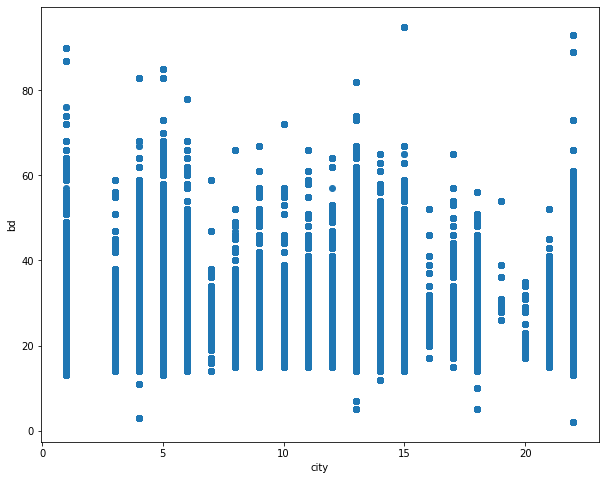

In [ ]:
#graph
fig, ax = plt.subplots(1,1,figsize=(10,8), sharex=False)
plt.scatter(x = member_music_df['city'],y = member_music_df['bd'])
ax.set_ylabel("bd")
ax.set_xlabel("city")
plt.show()



Visualize Relationship between target and expiration year using bivariate plot to see if expiration date matters


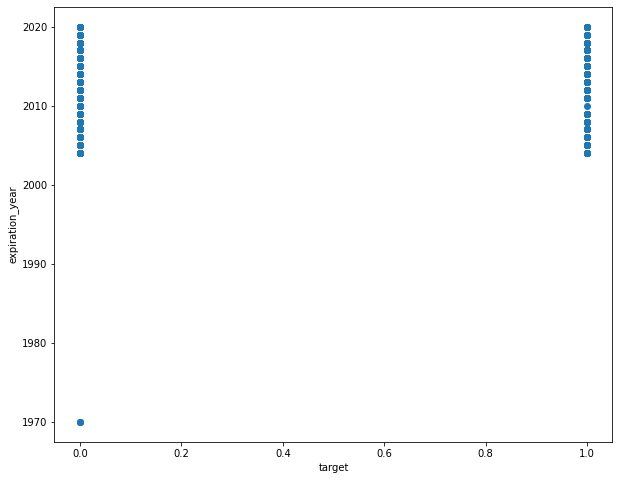

In [ ]:
#graph
fig, ax = plt.subplots(1,1,figsize=(10,8), sharex=False)
plt.scatter(x = member_music_df['target'],y = member_music_df['expiration_year'])
ax.set_ylabel("expiration_year")
ax.set_xlabel("target")
plt.show()

**Analysis:** it seems like there is no correlation between expiration year and target.

In [ ]:
#user的musiclist里面可能重听的music 
print(train_df.target.value_counts()*100/train_df.target.value_counts().sum())
print('unique songs ',len(train_df.song_id.unique()))
#unique() = Return unique values of Series object.
#len() to find unqiue sound.

1    50.351708
0    49.648292
Name: target, dtype: float64
unique songs  359966


Count of top 50 songs which users repeat listening to 

In [ ]:
repeats=train_df[train_df.target==1]
song_repeats=repeats.groupby('song_id',as_index=False).msno.count()
song_repeats.columns=['song_id','count']
##merge together 2 dataframe and create a new dataframe
song_repeats=pd.DataFrame(song_repeats).merge(song_df,left_on='song_id',right_on='song_id')
print("Print top 50 songs repeated")
repeats.song_id.value_counts().head(50)

Print top 50 songs repeated


reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    10885
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    10556
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=     9808
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=     9411
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=     9004
U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=     8787
YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=     8780
M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=     8403
43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=     8112
J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=     7903
cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=     7725
750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=     7608
IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=     7224
+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=     7061
DLBDZhOoW7zd7GBV99bi92ZXYUS26lzV+jJKbHshP5c=     6901
v/3onppBGoSpGsWb8iaCIO8eX5+iacbH5a4ZUhT7N54=     6879
p/yR06j/RQ2J6yGCFL0K+1R06OeG+eXcwxRgOHDo/Tk=     6536
Xpjwi8UAE2Vv9PZ6cZnhc58MCtl3cKZEO1sdAkqJ4mo=     6399
OaEbZ6TJ1NePtNUeEgWsvFLeopkS

# 2. Data Preprocessing


Note: This section is to show how to preprocess data. We can also directly start from Step 3 for data extract, transformation and load using integrated transformation function and skip this step if necessary

## 2.1 Filling missing values

### List of features that contain missing values

In [ ]:
missing_value_cols = [c for c in member_music_df.columns if member_music_df[c].isnull().any()]
missing_value_cols

['source_system_tab',
 'source_screen_name',
 'source_type',
 'song_length',
 'genre_ids',
 'artist_name',
 'composer',
 'lyricist',
 'language',
 'bd',
 'gender']

In [ ]:
member_music_df.count()

msno                       7377418
song_id                    7377418
source_system_tab          7352569
source_screen_name         6962614
source_type                7355879
target                     7377418
song_length                7377304
genre_ids                  7258963
artist_name                7377304
composer                   5701712
lyricist                   4198620
language                   7377268
city                       7377418
bd                         4430216
gender                     4415939
registered_via             7377418
registration_init_day      7377418
registration_init_month    7377418
registration_init_year     7377418
expiration_day             7377418
expiration_month           7377418
expiration_year            7377418
dtype: int64

In [ ]:
# list of columns with missing values
# ['source_system_tab',
#  'source_screen_name',
#  'source_type',
#  'song_length',
#  'genre_ids',
#  'artist_name',
#  'composer',
#  'lyricist',
#  'language',
#  'bd',
#  'gender']

def fill_missing_value_v1(x):
    # fill missing values with the most frequent values
    return x.fillna(x.value_counts().sort_values(ascending=False).index[0])
    
    

categorical_ls = ['source_system_tab', 'source_screen_name','source_type','genre_ids','artist_name','composer',
 'lyricist','gender']


numerical_ls = ['song_length','language','bd']
# Fill missing values 
for index in numerical_ls:
    member_music_df[index].fillna(member_music_df[index].median(), inplace=True)
for index in categorical_ls:
    member_music_df[index].fillna("no_data", inplace=True)


### Count of features after filling missing values

In [ ]:
member_music_df.count()

msno                       7377418
song_id                    7377418
source_system_tab          7377418
source_screen_name         7377418
source_type                7377418
target                     7377418
song_length                7377418
genre_ids                  7377418
artist_name                7377418
composer                   7377418
lyricist                   7377418
language                   7377418
city                       7377418
bd                         7377418
gender                     7377418
registered_via             7377418
registration_init_day      7377418
registration_init_month    7377418
registration_init_year     7377418
expiration_day             7377418
expiration_month           7377418
expiration_year            7377418
dtype: int64

In [ ]:

member_music_df[numerical_ls].head(100)

,song_length,language,bd
0,206471.0,52.0,27.0
1,284584.0,52.0,24.0
2,225396.0,52.0,24.0
3,255512.0,-1.0,24.0
4,187802.0,52.0,27.0
...,...,...,...
95,333024.0,3.0,27.0
96,288391.0,3.0,46.0
97,279196.0,3.0,46.0
98,240744.0,3.0,46.0


In [ ]:

member_music_df[categorical_ls].head(100)

,source_system_tab,source_screen_name,source_type,genre_ids,artist_name,composer,lyricist,gender
0,explore,Explore,online-playlist,359,Bastille,Dan Smith| Mark Crew,no_data,no_data
1,my library,Local playlist more,local-playlist,1259,Various Artists,no_data,no_data,female
2,my library,Local playlist more,local-playlist,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,no_data,female
3,my library,Local playlist more,local-playlist,1019,Soundway,Kwadwo Donkoh,no_data,female
4,explore,Explore,online-playlist,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,no_data,no_data
...,...,...,...,...,...,...,...,...
95,my library,no_data,local-library,458,楊乃文 (Naiwen Yang),黃建為,葛大為,male
96,my library,Local playlist more,local-library,458,陳奕迅 (Eason Chan),Jun Jie Lin,no_data,female
97,my library,Local playlist more,local-library,458,周杰倫 (Jay Chou),周杰倫,方文山,female
98,my library,Local playlist more,local-library,465,范瑋琪 (Christine Fan),非非,非非,female


## 2.2 Data Transformation
We can see that the columns like genre_ids, composer, lyricist have multiple values in a cell. In this case, the count of genres, composers, lyricist could be useful information as well

In [ ]:
member_music_df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_day', 'registration_init_month',
       'registration_init_year', 'expiration_day', 'expiration_month',
       'expiration_year'],
      dtype='object')

In [ ]:
member_music_df.genre_ids.nunique(), member_music_df.composer.nunique(), member_music_df.lyricist.nunique()

(573, 76065, 33889)

In [ ]:

def count_items(x):
    if x =="no_data":
        return 0
    return sum(map(x.count, ['|', '/', '\\', ';',','])) + 1

member_music_df['genre_count']=  member_music_df['genre_ids'].apply(count_items)
member_music_df['composer_count']=  member_music_df['composer'].apply(count_items)
member_music_df['lyricist_count']=  member_music_df['lyricist'].apply(count_items)

In [ ]:
member_music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year,genre_count,composer_count,lyricist_count
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,no_data,52.0,1,27.0,no_data,7,2,1,2012,5,10,2017,1,2,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,no_data,no_data,52.0,13,24.0,female,9,25,5,2011,11,9,2017,1,0,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,no_data,52.0,13,24.0,female,9,25,5,2011,11,9,2017,1,1,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,no_data,-1.0,13,24.0,female,9,25,5,2011,11,9,2017,1,1,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,no_data,52.0,1,27.0,no_data,7,2,1,2012,5,10,2017,1,3,0


In [ ]:
member_music_df.info()

# 3. Data Extract, Transform and Load (ETL)

This step build a data pipeline to clean and transform data directly right before training model. We can skip Step 2 if we just want to transform data and tune models directly

## 3.1 Transformation Function for Data cleaning

In [ ]:
#import necessary packages here
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

np.random.seed(2020)

In [ ]:
def transform_data(data, song_df, members_df):
    # Merge song data with data set
    data = data.merge(song_df,on='song_id',how="left", copy =False)
    
    # preprocess member data
    members_df["registration_init_time"] = pd.to_datetime(members_df["registration_init_time"], format="%Y%m%d")
    members_df["expiration_date"] = pd.to_datetime(members_df["expiration_date"], format="%Y%m%d")
    members_df["registration_init_day"] = members_df["registration_init_time"].dt.day
    members_df["registration_init_month"] = members_df["registration_init_time"].dt.month
    members_df["registration_init_year"] = members_df["registration_init_time"].dt.year
    members_df["expiration_day"] = members_df["expiration_date"].dt.day
    members_df["expiration_month"] = members_df["expiration_date"].dt.month
    members_df["expiration_year"] = members_df["expiration_date"].dt.year
    members_df = members_df.drop(columns = ["registration_init_time", "expiration_date"],axis=1)    
    
    # merge member data with dataset
    data = data.merge(members_df,on='msno',how="left", copy=False)
    
    # Remove outliers of bd age 
    data['bd'].loc[(data['bd']<=0) | (data['bd']>=100)]= np.nan

    categorical_ls = ['source_system_tab', 'source_screen_name','source_type','genre_ids','artist_name','composer',
     'lyricist','gender']


    numerical_ls = ['song_length','language','bd']
    # Fill missing values 
    for index in numerical_ls:
        data[index].fillna(data[index].median(), inplace=True)
    for index in categorical_ls:
        data[index].fillna("no_data", inplace=True)
        
    
    def count_items(x):
        if x =="no_data":
            return 0
        return sum(map(x.count, ['|', '/', '\\', ';',','])) + 1

    data['genre_count']=  data['genre_ids'].apply(count_items)
    data['composer_count']=  data['composer'].apply(count_items)
    data['lyricist_count']=  data['lyricist'].apply(count_items)
    
    # Convert object type to categorical type
    for c in data.columns:
        if data[c].dtype=='O':
            data[c] = data[c].astype("category",copy=False)
    if 'id' in data.columns:
        ids = data['id']
        data.drop(['id'], inplace=True,axis=1)
    else:
        ids =None
    return ids, data

In [ ]:
root = './kaggle/working/train/data/'
train_df = pd.read_csv(root+ "train.csv")
test_df = pd.read_csv(root+ "test.csv")
song_df = pd.read_csv(root+ "songs.csv")
# song_extra_df = pd.read_csv(root+ "song_extra_info.csv")
members_df = pd.read_csv(root+ "members.csv")

In [ ]:
_, train_data = transform_data(train_df, song_df, members_df)

Visualize the Correlation matrix after transforming data

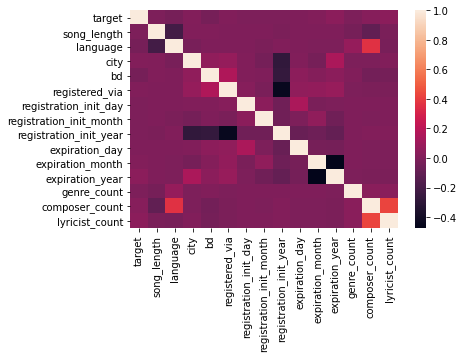

In [ ]:
corr_matrix = train_data.corr()
_ = sns.heatmap(corr_matrix)

In [ ]:
corr_matrix

,target,song_length,language,city,bd,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year,genre_count,composer_count,lyricist_count
target,1.000000,-0.001809,-0.027537,0.012114,-0.029062,0.009893,-0.001765,-0.005573,-0.001962,0.001923,0.011817,0.042248,-0.005689,0.027213,0.043528
song_length,-0.001809,1.000000,-0.210436,0.005185,0.007685,0.002749,-0.000002,0.001518,-0.007435,0.000385,0.001309,0.004572,-0.026094,-0.102079,-0.015731
language,-0.027537,-0.210436,1.000000,-0.022197,-0.000909,-0.000232,0.001511,-0.006916,0.009072,-0.000452,-0.001253,-0.003990,0.077519,0.362132,-0.021813
city,0.012114,0.005185,-0.022197,1.000000,0.057512,0.073756,0.007842,-0.033314,-0.280175,0.004892,-0.024833,0.150147,-0.005528,-0.004215,0.004835
bd,-0.029062,0.007685,-0.000909,0.057512,1.000000,0.162485,0.006868,0.001192,-0.269699,0.047448,0.020474,0.040012,0.005317,-0.035854,-0.035338
registered_via,0.009893,0.002749,-0.000232,0.073756,0.162485,1.000000,0.025543,-0.017697,-0.442730,0.056956,0.064732,0.084135,-0.001597,-0.010430,-0.012037
registration_init_day,-0.001765,-0.000002,0.001511,0.007842,0.006868,0.025543,1.000000,0.044437,-0.047175,0.149351,-0.013526,-0.002089,0.000056,0.000031,0.000829
registration_init_month,-0.005573,0.001518,-0.006916,-0.033314,0.001192,-0.017697,0.044437,1.000000,-0.047701,-0.006693,0.056911,-0.047909,0.000605,-0.004635,-0.000032
registration_init_year,-0.001962,-0.007435,0.009072,-0.280175,-0.269699,-0.442730,-0.047175,-0.047701,1.000000,-0.078462,-0.057629,-0.092018,0.003892,0.013826,0.013835
expiration_day,0.001923,0.000385,-0.000452,0.004892,0.047448,0.056956,0.149351,-0.006693,-0.078462,1.000000,-0.029495,-0.030104,0.001198,-0.002181,-0.003404


**Analysis**: we can see that composer count is highly correlated to language, lyricist_count. The top 3 attributes correlated to target are lyricist_count, expiration year, language

In [ ]:
y_train = train_data['target']
train_data.drop(['target'], axis=1,inplace=True)
X_train = train_data

In [ ]:
X_train.head()

## 3.2 Transform features: composer, artist, lyricist, to create new features, like counts of composer, artist, lyricist, etc

### 3.2.1 Transform train set

Transform the name of  composer, artist, lyricist to new features like counts, number of intersection of names 

In [ ]:
def transform_names_intersection(data):
    #This function finds the intersection of names in composer, artist, lyricist
    def check_name_list(x):
        #convert string to name list dataframe
        strings = None
        strings = x.str.split(r"//|/|;|、|\| ")
        return strings
    
    df = data[["composer","artist_name", "lyricist"]].apply(check_name_list)
    data["composer_artist_intersect"] =[len(set(a) & set(b)) for a, b in zip(df.composer, df.artist_name)] 
    data["composer_lyricist_intersect"] =[len(set(a) & set(b)) for a, b in zip(df.composer, df.lyricist)] 
    data["artist_lyricist_intersect"] =[len(set(a) & set(b)) for a, b in zip(df.artist_name, df.lyricist)] 
    return data
    
_ = transform_names_intersection(X_train)
X_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year,genre_count,composer_count,lyricist_count,composer_artist_intersect,composer_lyricist_intersect,artist_lyricist_intersect
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,206471.0,359,Bastille,Dan Smith| Mark Crew,no_data,52.0,1,27.0,no_data,7,2,1,2012,5,10,2017,1,2,0,0,0,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,284584.0,1259,Various Artists,no_data,no_data,52.0,13,24.0,female,9,25,5,2011,11,9,2017,1,0,0,0,1,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,no_data,52.0,13,24.0,female,9,25,5,2011,11,9,2017,1,1,0,0,0,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,255512.0,1019,Soundway,Kwadwo Donkoh,no_data,-1.0,13,24.0,female,9,25,5,2011,11,9,2017,1,1,0,0,0,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,no_data,52.0,1,27.0,no_data,7,2,1,2012,5,10,2017,1,3,0,1,0,0


### 3.2.2 Transform Testset

In [ ]:
ids, test_data = transform_data(test_df, song_df, members_df)
_ = transform_names_intersection(test_data)
test_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year,genre_count,composer_count,lyricist_count,composer_artist_intersect,composer_lyricist_intersect,artist_lyricist_intersect
0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,no_data,3.0,1,27.0,no_data,7,19,2,2016,18,9,2017,1,1,0,0,0,0
1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,1,27.0,no_data,7,19,2,2016,18,9,2017,1,1,2,0,0,0
2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,no_data,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,1,27.0,no_data,4,17,11,2016,24,11,2016,1,1,1,0,1,0
3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,no_data,52.0,3,30.0,male,9,25,7,2007,30,4,2017,1,4,0,0,0,0
4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,Neuromancer,no_data,-1.0,3,30.0,male,9,25,7,2007,30,4,2017,1,1,0,0,0,0


In [ ]:
test_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year,genre_count,composer_count,lyricist_count,composer_artist_intersect,composer_lyricist_intersect,artist_lyricist_intersect
0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,no_data,3.0,1,27.0,no_data,7,19,2,2016,18,9,2017,1,1,0,0,0,0
1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,1,27.0,no_data,7,19,2,2016,18,9,2017,1,1,2,0,0,0
2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,no_data,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,1,27.0,no_data,4,17,11,2016,24,11,2016,1,1,1,0,1,0
3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,no_data,52.0,3,30.0,male,9,25,7,2007,30,4,2017,1,4,0,0,0,0
4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,Neuromancer,no_data,-1.0,3,30.0,male,9,25,7,2007,30,4,2017,1,1,0,0,0,0


## 3.3 Split validation set and trainset

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, train_test_split
ss_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2021)

# Split training set and testing set
train_index, valid_index ,test_index = None, None, None
for train_i, test_i in ss_split.split(np.zeros(y_train.shape) ,y_train):
    train_index = train_i
    test_index = test_i
    print("Train set size:",len(train_index), "Test set size:",len(test_index))
    



(5901934,) (1475484,)


In [ ]:
X_validset = X_train.iloc[test_index]
y_validset = y_train.iloc[test_index].values

X_trainset = X_train.iloc[train_index]
y_trainset = y_train.iloc[train_index].values

#delete dataframes to save space
del X_train, y_train


Check the information of training set after splitting dataset

In [ ]:
X_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901934 entries, 7066318 to 5275539
Data columns (total 27 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   msno                         category
 1   song_id                      category
 2   source_system_tab            category
 3   source_screen_name           category
 4   source_type                  category
 5   song_length                  float64 
 6   genre_ids                    category
 7   artist_name                  category
 8   composer                     category
 9   lyricist                     category
 10  language                     float64 
 11  city                         int64   
 12  bd                           float64 
 13  gender                       category
 14  registered_via               int64   
 15  registration_init_day        int64   
 16  registration_init_month      int64   
 17  registration_init_year       int64   
 18  expiration_day  

# 4. LGBM Modeling
Light Gradient Boosting Machine (LGBM) model is a tree-based model, which use Boosting ensemble learning method to combine and train multiple decision tree models to do classification or regression task. It can automatically encode categorical data into labels or one-hot encoding vectors and train models.

Since it provides a fast way to transform categorical data and train model with good accuracy performance based on the results from leaderboard in kaggle, we try it here and tune its parameters to fit the data. Here is the reference to use LGBM: https://lightgbm.readthedocs.io/en/latest/Quick-Start.html

**Input to models:**
 The input features to LGBM model are the features shown above

**Output from models:**
The output from LGBM model is the possibility that user may repeat listening to the music

**Parameter Settings:**
+ Objective loss function: binary cross entropy loss
+ metric: area under curve of False Positive Rate vs True Positive Rate (AUC)
+ Number of leaves: 110
+ max_depth: [10, 15, 20, 25, 30]
+ Boosting method: gradient boosting 
+ Number of rounds: 200
+ maximum bin: 256
+ bagging fraction: 0.95

In [ ]:
import lightgbm as lgb
train_set = lgb.Dataset(X_trainset, y_trainset)
valid_set = lgb.Dataset(X_validset, y_validset)

In [ ]:
num_leaves = 110
max_depths = [10, 15, 20, 25,30]

## 5.Model Training and Validation on LGBM models

In [ ]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': num_leaves,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': max_depths[0],
        'num_rounds': 200,
        'metric' : 'auc'
    }

%time model_f1 = lgb.train(params, train_set=train_set,  valid_sets=valid_set, verbose_eval=5)

[5]	valid_0's auc: 0.710928
[10]	valid_0's auc: 0.723954
[15]	valid_0's auc: 0.731661
[20]	valid_0's auc: 0.736653
[25]	valid_0's auc: 0.740424
[30]	valid_0's auc: 0.744678
[35]	valid_0's auc: 0.749056
[40]	valid_0's auc: 0.752277
[45]	valid_0's auc: 0.754501
[50]	valid_0's auc: 0.756448
[55]	valid_0's auc: 0.758097
[60]	valid_0's auc: 0.75991
[65]	valid_0's auc: 0.761418
[70]	valid_0's auc: 0.762683
[75]	valid_0's auc: 0.764243
[80]	valid_0's auc: 0.765646
[85]	valid_0's auc: 0.766883
[90]	valid_0's auc: 0.767921
[95]	valid_0's auc: 0.769111
[100]	valid_0's auc: 0.770006
[105]	valid_0's auc: 0.770934
[110]	valid_0's auc: 0.772012
[115]	valid_0's auc: 0.772747
[120]	valid_0's auc: 0.773835
[125]	valid_0's auc: 0.774486
[130]	valid_0's auc: 0.775258
[135]	valid_0's auc: 0.775887
[140]	valid_0's auc: 0.776838
[145]	valid_0's auc: 0.777587
[150]	valid_0's auc: 0.778113
[155]	valid_0's auc: 0.778714
[160]	valid_0's auc: 0.77929
[165]	valid_0's auc: 0.779884
[170]	valid_0's auc: 0.780354
[1

In [ ]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': num_leaves,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': max_depths[1],
        'num_rounds': 200,
        'metric' : 'auc'
    }

%time model_f2 = lgb.train(params, train_set=train_set,  valid_sets=valid_set, verbose_eval=5)

[5]	valid_0's auc: 0.727917
[10]	valid_0's auc: 0.742629
[15]	valid_0's auc: 0.74811
[20]	valid_0's auc: 0.754257
[25]	valid_0's auc: 0.758256
[30]	valid_0's auc: 0.76119
[35]	valid_0's auc: 0.763674
[40]	valid_0's auc: 0.76626
[45]	valid_0's auc: 0.7681
[50]	valid_0's auc: 0.769933
[55]	valid_0's auc: 0.771692
[60]	valid_0's auc: 0.773121
[65]	valid_0's auc: 0.774693
[70]	valid_0's auc: 0.776149
[75]	valid_0's auc: 0.777157
[80]	valid_0's auc: 0.778674
[85]	valid_0's auc: 0.780085
[90]	valid_0's auc: 0.78098
[95]	valid_0's auc: 0.782016
[100]	valid_0's auc: 0.783028
[105]	valid_0's auc: 0.783782
[110]	valid_0's auc: 0.784875
[115]	valid_0's auc: 0.785417
[120]	valid_0's auc: 0.786042
[125]	valid_0's auc: 0.78665
[130]	valid_0's auc: 0.787237
[135]	valid_0's auc: 0.787897
[140]	valid_0's auc: 0.788426
[145]	valid_0's auc: 0.788904
[150]	valid_0's auc: 0.789517
[155]	valid_0's auc: 0.78991
[160]	valid_0's auc: 0.790561
[165]	valid_0's auc: 0.791319
[170]	valid_0's auc: 0.791855
[175]	va

In [ ]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': num_leaves,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': max_depths[2],
        'num_rounds': 200,
        'metric' : 'auc'
    }

%time model_f3 = lgb.train(params, train_set=train_set,  valid_sets=valid_set, verbose_eval=5)

[5]	valid_0's auc: 0.734133
[10]	valid_0's auc: 0.749742
[15]	valid_0's auc: 0.75615
[20]	valid_0's auc: 0.761276
[25]	valid_0's auc: 0.766358
[30]	valid_0's auc: 0.769127
[35]	valid_0's auc: 0.771531
[40]	valid_0's auc: 0.773761
[45]	valid_0's auc: 0.775287
[50]	valid_0's auc: 0.777329
[55]	valid_0's auc: 0.779154
[60]	valid_0's auc: 0.780391
[65]	valid_0's auc: 0.782072
[70]	valid_0's auc: 0.783786
[75]	valid_0's auc: 0.784989
[80]	valid_0's auc: 0.785685
[85]	valid_0's auc: 0.786851
[90]	valid_0's auc: 0.787643
[95]	valid_0's auc: 0.788312
[100]	valid_0's auc: 0.789305
[105]	valid_0's auc: 0.790256
[110]	valid_0's auc: 0.791037
[115]	valid_0's auc: 0.79177
[120]	valid_0's auc: 0.792466
[125]	valid_0's auc: 0.792988
[130]	valid_0's auc: 0.793478
[135]	valid_0's auc: 0.793961
[140]	valid_0's auc: 0.794871
[145]	valid_0's auc: 0.795495
[150]	valid_0's auc: 0.795952
[155]	valid_0's auc: 0.796269
[160]	valid_0's auc: 0.796888
[165]	valid_0's auc: 0.797808
[170]	valid_0's auc: 0.7982
[175

In [ ]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': num_leaves,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': max_depths[3],
        'num_rounds': 200,
        'metric' : 'auc'
    }

%time model_f4 = lgb.train(params, train_set=train_set,  valid_sets=valid_set, verbose_eval=5)

[5]	valid_0's auc: 0.736351
[10]	valid_0's auc: 0.754592
[15]	valid_0's auc: 0.76195
[20]	valid_0's auc: 0.766405
[25]	valid_0's auc: 0.770538
[30]	valid_0's auc: 0.772566
[35]	valid_0's auc: 0.775789
[40]	valid_0's auc: 0.777994
[45]	valid_0's auc: 0.779658
[50]	valid_0's auc: 0.781394
[55]	valid_0's auc: 0.783194
[60]	valid_0's auc: 0.784808
[65]	valid_0's auc: 0.786109
[70]	valid_0's auc: 0.787265
[75]	valid_0's auc: 0.788079
[80]	valid_0's auc: 0.789109
[85]	valid_0's auc: 0.78986
[90]	valid_0's auc: 0.790613
[95]	valid_0's auc: 0.791347
[100]	valid_0's auc: 0.79209
[105]	valid_0's auc: 0.793348
[110]	valid_0's auc: 0.79409
[115]	valid_0's auc: 0.794754
[120]	valid_0's auc: 0.795411
[125]	valid_0's auc: 0.795866
[130]	valid_0's auc: 0.796604
[135]	valid_0's auc: 0.79781
[140]	valid_0's auc: 0.798172
[145]	valid_0's auc: 0.798723
[150]	valid_0's auc: 0.799132
[155]	valid_0's auc: 0.799488
[160]	valid_0's auc: 0.800115
[165]	valid_0's auc: 0.800509
[170]	valid_0's auc: 0.800784
[175]

In [ ]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': num_leaves,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': max_depths[4],
        'num_rounds': 200,
        'metric' : 'auc'
    }

%time model_f5 = lgb.train(params, train_set=train_set,  valid_sets=valid_set, verbose_eval=5)

[5]	valid_0's auc: 0.739442
[10]	valid_0's auc: 0.757442
[15]	valid_0's auc: 0.766439
[20]	valid_0's auc: 0.77132
[25]	valid_0's auc: 0.774735
[30]	valid_0's auc: 0.777071
[35]	valid_0's auc: 0.779247
[40]	valid_0's auc: 0.781616
[45]	valid_0's auc: 0.782953
[50]	valid_0's auc: 0.785154
[55]	valid_0's auc: 0.786877
[60]	valid_0's auc: 0.787993
[65]	valid_0's auc: 0.788839
[70]	valid_0's auc: 0.790254
[75]	valid_0's auc: 0.791088
[80]	valid_0's auc: 0.792455
[85]	valid_0's auc: 0.79365
[90]	valid_0's auc: 0.794445
[95]	valid_0's auc: 0.795072
[100]	valid_0's auc: 0.796276
[105]	valid_0's auc: 0.797737
[110]	valid_0's auc: 0.798265
[115]	valid_0's auc: 0.799021
[120]	valid_0's auc: 0.799964
[125]	valid_0's auc: 0.800469
[130]	valid_0's auc: 0.801445
[135]	valid_0's auc: 0.801851
[140]	valid_0's auc: 0.802299
[145]	valid_0's auc: 0.802599
[150]	valid_0's auc: 0.803381
[155]	valid_0's auc: 0.803696
[160]	valid_0's auc: 0.803926
[165]	valid_0's auc: 0.80443
[170]	valid_0's auc: 0.804694
[17

## 6.Model Evaluation on LGBM models

In [ ]:
from sklearn.metrics import accuracy_score
def evaluation_lgbm(model, X =X_validset , y= y_validset):
    
    out = model.predict(X)
    preds = out>=0.5
    acc = accuracy_score(preds, y)
    print("Evaluation acc:", acc)
    return acc


In [ ]:
X_validset.shape


(1475484, 27)

In [ ]:
acc_1 = evaluation_lgbm(model_f1)
acc_2 = evaluation_lgbm(model_f2)
acc_3 = evaluation_lgbm(model_f3)
acc_4 = evaluation_lgbm(model_f4)
acc_5 = evaluation_lgbm(model_f5)

Evaluation acc: 0.709764389176704
Evaluation acc: 0.719106408473423
Evaluation acc: 0.7236893114395005
Evaluation acc: 0.7258221708944319
Evaluation acc: 0.728842196865571


In [ ]:
eval_df = pd.DataFrame({"Lgbm with max_depth":max_depths,"Validation Accuracy":[acc_1,acc_2,acc_3,acc_4,acc_5]})
eval_df

,Lgbm with max_depth,Validation Accuracy
0,10,0.709764
1,15,0.719106
2,20,0.723689
3,25,0.725822
4,30,0.728842


## Create Submission Files

In [ ]:
models = [model_f1,model_f2,model_f3,model_f4,model_f5]
for i in range(len(models)):
  preds_test = models[i].predict(test_data)
  submission = pd.DataFrame()
  submission['id'] = ids
  submission['target'] = preds_test
  submission.to_csv(root + 'submission_lgbm_model_'+ str(i)+'.csv.gz', compression = 'gzip', index=False, float_format = '%.5f')
  print("Predictions from model ",i,": ",preds_test)

Predictions from model  0 :  [0.47177512 0.48584262 0.19651648 ... 0.39917036 0.30263348 0.36468783]
Predictions from model  1 :  [0.45280296 0.55415074 0.17824637 ... 0.41500494 0.30757934 0.34520384]
Predictions from model  2 :  [0.39847416 0.48724786 0.15954141 ... 0.38293317 0.27657349 0.28451098]
Predictions from model  3 :  [0.3825275  0.39659855 0.15904321 ... 0.3515784  0.21812496 0.28995803]
Predictions from model  4 :  [0.3951268  0.45704878 0.14609333 ... 0.35033303 0.23065677 0.2885925 ]


## Accuracy Scores from kaggle test set

|Model name       | private score  | public score |
|- |-| -|
| LGBM Boosting Machine Model 4 | 0.67423 | 0.67256
| LGBM Boosting Machine Model 3 | 0.67435 | 0.67241
| LGBM Boosting Machine Model 2 | 0.67416 | 0.67208
| LGBM Boosting Machine Model 1 | 0.67416 | 0.67188
| LGBM Boosting Machine Model 0 | 0.67206 | 0.66940

# 4. Wide & Depth neural network model

### Label Encoding for categorical data
Convert categorical data into numerical labels before using embedding

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_ls1 = ['source_system_tab', 'source_screen_name','source_type','genre_ids','gender']
categorical_ls2 = ['artist_name','composer', 'lyricist']


numerical_ls = ['song_length','language','bd',"registration_init_year",
                "expiration_day","expiration_month","expiration_year",
                "genre_count","composer_count","lyricist_count","composer_artist_intersect",
                "composer_lyricist_intersect","artist_lyricist_intersect"]

max_values = {}
# labelencoders = {}
for col in categorical_ls1:
    print(col)
    lbl = LabelEncoder()
    df = pd.concat([X_trainset[col], X_validset[col],test_data[col]],ignore_index=True)
    lbl.fit(df)
    df = lbl.transform(list(df.values.astype('str',copy=False)))
    X_trainset[col] = lbl.transform(list(X_trainset[col].values.astype('str',copy=False)))
    X_validset[col] = lbl.transform(list(X_validset[col].values.astype('str',copy=False)))
    test_data[col] = lbl.transform(list(test_data[col].values.astype('str',copy=False)))
    max_values[col] = df.max() + 2 #set the range of embedding input larger

# Compute embedding dimensions
emb_dims1 = []
emb_dims2 = []
for i in categorical_ls1:
    emb_dims1.append((max_values[i], min((max_values[i]+1)//2, 50)))

source_system_tab
source_screen_name
source_type
genre_ids
gender


In [ ]:
# max_values
X_trainset.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year,genre_count,composer_count,lyricist_count,composer_artist_intersect,composer_lyricist_intersect,artist_lyricist_intersect
7066318,BQ7nOoOUipsqjOBANK+ilA8F7TVaOHSI8gVPWElXsuI=,FaTUlIiCh/6sEOasPm1vgIk9XqavgSGgRGYuOkzTF0o=,0,3,7,203520.0,364,田馥甄 (Hebe),倪子岡,李格弟,3.0,5,25.0,0,9,2,9,2006,11,10,2017,1,1,1,0,0,0
1471565,Ul+UpO5PxuhCn040AK8gzR1A/mE/k3KbL13gO7Uc4Ts=,+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=,3,8,3,283846.0,371,陳勢安 (Andrew Tan),覃嘉健,馬嵩惟,3.0,13,47.0,0,9,1,2,2006,30,9,2017,1,1,1,0,0,0
6176886,sa6oKy94c62R5Eq0YHkNzZrJSo9j5E7JGjTDHnYRKqs=,K6fBQxiNhgWazjXrZUGlZIm9ltT4o+Vq19sWmZRdAhg=,2,12,2,296960.0,371,蔡依林 (Jolin Tsai),郭子,鄔裕康,3.0,5,38.0,1,7,27,11,2011,30,12,2017,1,1,1,0,0,0
3527889,LG/BLgJxw5AvXy0pkgaHYYWeU7jKS+ms/51+7TaBY9Y=,O+/KJ5a5GzbgLZrCOw/t/iDOPTrDcrz5ZnOtaK9blA8=,3,8,0,235403.0,200,ONE OK ROCK,Toru/Taka,Taka,17.0,1,27.0,2,7,1,6,2013,1,10,2017,1,2,1,0,1,0
6073849,KmAJtsNcrofH6qMoHvET89mQAlC1EN3r3r3rkfW2iT4=,WogFv1yz1n49l4gNSbf76bWxas8nNvzHntrj4FuzC24=,3,22,7,210604.0,371,Twins,no_data,no_data,24.0,13,28.0,1,9,2,11,2016,7,10,2017,1,0,0,0,1,0


In [ ]:
X_validset.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_day,registration_init_month,registration_init_year,expiration_day,expiration_month,expiration_year,genre_count,composer_count,lyricist_count,composer_artist_intersect,composer_lyricist_intersect,artist_lyricist_intersect
3400479,RZDFiPWpvwi1RWF5NAPEkvmogqe+7rGys+zoLU9he2M=,MvON55vzjT7QW7GSs/UVLZrE/LJpMAVFUjXwZczdw40=,0,11,7,356379.0,97,Nas,Amy Winehouse| Salaam Remi| Nasir Jones p/k/a NAS,no_data,52.0,1,27.0,2,7,7,12,2010,20,9,2017,1,5,0,0,0,0
2481022,C3EZ5oh7XDt5fP9OY20RPlD8MA+rBknmvmDhA1tHGMU=,5PvPCUIB7vVuCNpQRKXIOcWvh9EerujDAbrjV7G6ZE0=,3,8,3,216920.0,349,貴族精選,no_data,Super Market| Microdot,31.0,5,27.0,2,3,11,12,2012,5,1,2018,1,0,2,0,0,0
5808216,O1pwjdTED6P3lKm52VBxVUtaSVc31S9PmIw+07WBNw4=,va3+1L2wraJkzDbHjvdo+e+0TTJcLko0k0pqBn09nJE=,3,8,3,268225.0,548,Various Artists,no_data,no_data,3.0,13,82.0,0,9,29,4,2007,23,1,2018,1,0,0,0,1,0
42686,WFCCMzA4hADGBduTS6X8mXlutyiC0P33QkTG6zr5yCg=,U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=,7,11,7,290063.0,364,周杰倫 (Jay Chou),周杰倫,方文山,3.0,13,32.0,0,7,12,12,2010,9,9,2017,1,1,1,0,0,0
1850837,h0fTru8nYMv9bR0j6kBh8kiXDaybzWBYaSHbUIVzeBs=,J1sgBEFbcXSK6eiN7CK1WNxsso0/sY6t0BMX+c+iPNw=,0,11,7,220450.0,111,Usher,no_data,no_data,52.0,22,28.0,0,9,2,1,2008,28,9,2017,3,0,0,0,1,0


### **Wide and Deep Neural network model（2 branches-->merge two branches-->main branch）**
![网络图](https://github.com/LianxinGao/kaggle/blob/master/pics/net.jpg?raw=true)

This model transform categorical attributes into dense vectors using embedding network in neural network, which enable us to reduce the dimension of categorical data and extract main features like PCA.

Then it combines dense embedded vectors with numerical data for features selection and classifcation in the main branch. The main branch is a traditional Neural network using linear layers, activation functions (relu, softmax, sigmoid),which works as a classfication function

The output is possibility that user may repeat listening to the music.

#### **Network Architecture**
The architecture of neural network is as follow:
+ Block 1:
  + Linear
  + Relu
  + Dropout
  + Batch Normalization

+ Branch of categorical data:
  + categorical input data
  + Embedding
  + Block1
  + Block1

+ Main Branch:
  + Concatenate output from Branch of categorical data and Numerical data
  + Block1 
  + Block1
  + Linear
  + Softmax


The architecture of Wide and Deep Model is referred to https://github.com/zenwan/Wide-and-Deep-PyTorch

We also modify the output layer of the model to predict possibility value in range [0,1] using sigmoid function and use one branch of categorical data only.

#### **Input Features to network**
The input features to category embedding branch are: 
  + source_system_tab , source_screen_name ,source_type ,genre_ids ,gender

The input features to numerical branch are:
 + song_length, language , bd/age, registration_init_year, expiration_day, expiration_month,expiration_year, genre_count,composer_count,lyricist_count,composer_artist_intersect, composer_lyricist_intersect,artist_lyricist_intersect

  

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
class TabularDataset(Dataset):
    def __init__(self, x_data, y_data, cat_cols1, cat_cols2, num_cols):
        
        """
        data: pandas data frame;
        cat_cols: list of string, the names of the categorical columns in the data, will be passed through the embedding layers;
        num_cols: list of string
        y_data: the target
        """
        self.n = x_data.shape[0]
        self.y = y_data.astype(np.float32).reshape(-1, 1)#.values.reshape(-1, 1)
       
        self.cat_cols1 = cat_cols1
        self.cat_cols2 = cat_cols2
        self.num_cols = num_cols
        
        self.num_X = x_data[self.num_cols].astype(np.float32).values
        self.cat_X1 = x_data[self.cat_cols1].astype(np.int64).values
        self.cat_X2 = x_data[self.cat_cols2].astype(np.int64).values
        
    
    def print_data(self):
        return self.num_X, self.cat_X1, self.cat_X2, self.y
    
    def __len__(self):
        """
        total number of samples
        """
        return self.n
    
    def __getitem__(self, idx):
        """
        Generates one sample of data.
        """
        return [self.y[idx], self.num_X[idx], self.cat_X1[idx], self.cat_X2[idx]]



In [ ]:
train_dataset = TabularDataset(x_data=X_trainset, y_data=y_trainset, cat_cols1=categorical_ls1, 
                               cat_cols2=[], num_cols=numerical_ls)

val_dataset = TabularDataset(x_data=X_validset, y_data=y_validset, cat_cols1=categorical_ls1,
                             cat_cols2=[], num_cols=numerical_ls)



In [ ]:
class FeedForwardNN(nn.Module):
    def __init__(self, emb_dims1, emb_dims2, no_of_num, lin_layer_sizes, output_size, emb_dropout, lin_layer_dropouts, branch2_enable=0):
        """
        emb_dims:           List of two element tuples;
        no_of_num:          Integer, the number of continuous features in the data;
        lin_layer_sizes:    List of integers. The size of each linear layer;
        output_size:        Integer, the size of the final output;
        emb_dropout:        Float, the dropout to be used after the embedding layers.
        lin_layer_dropouts: List of floats, the dropouts to be used after each linear layer.
        """
        super().__init__()
        self.branch2_enable = branch2_enable
        # embedding layers
        self.emb_layers1 = nn.ModuleList([nn.Embedding(x, y) for x, y in emb_dims1])
        self.emb_layers2 = nn.ModuleList([nn.Embedding(x, y) for x, y in emb_dims2])
        
        # 计算各个emb参数数量，为后续Linear layer的输入做准备
        self.no_of_embs1 = sum([y for x, y in emb_dims1])
        self.no_of_embs2 = sum([y for x, y in emb_dims2])
        self.no_of_num = no_of_num
        
        # 分支1
        self.branch1 = nn.Linear(self.no_of_embs1, lin_layer_sizes[0])
        self.branch1_2 = nn.Linear(lin_layer_sizes[0], lin_layer_sizes[1])
        nn.init.kaiming_normal_(self.branch1.weight.data)
        nn.init.kaiming_normal_(self.branch1_2.weight.data)
        
        # 分支2
        if branch2_enable:
            self.branch2 = nn.Linear(self.no_of_embs2, lin_layer_sizes[0] * 2)
            self.branch2_2 = nn.Linear(lin_layer_sizes[0] * 2, lin_layer_sizes[1] * 2)
            nn.init.kaiming_normal_(self.branch2.weight.data)
            nn.init.kaiming_normal_(self.branch2_2.weight.data)

        # 主分支
#         self.main_layer1 = nn.Linear(lin_layer_sizes[1] * 3 + self.no_of_num, lin_layer_sizes[2])
        self.main_layer1 = nn.Linear(77, lin_layer_sizes[2])
        self.main_layer2 = nn.Linear(lin_layer_sizes[2], lin_layer_sizes[3])
        
        # batch normal
        self.branch_bn_layers1 = nn.BatchNorm1d(lin_layer_sizes[0])
        self.branch_bn_layers2 = nn.BatchNorm1d(lin_layer_sizes[0] * 2)
        self.main_bn_layer = nn.BatchNorm1d(lin_layer_sizes[2])
        
        # Dropout Layers
        self.emb_dropout_layer = nn.Dropout(emb_dropout)
        self.dropout_layers = nn.ModuleList([nn.Dropout(size) for size in lin_layer_dropouts])
        
        # Output layer
        self.output_layer = nn.Linear(lin_layer_sizes[-1], output_size)
        nn.init.kaiming_normal_(self.output_layer.weight.data)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, num_data, cat_data1, cat_data2):
        # embedding categorical feature and cat them together
        x1 = [emb_layer(torch.tensor(cat_data1[:, i])) for i, emb_layer in enumerate(self.emb_layers1)]
        x1 = torch.cat(x1, 1)
        
        x1 = self.emb_dropout_layer(F.relu(self.branch1(x1)))
        x1 = self.branch_bn_layers1(x1)
        x1 = self.dropout_layers[0](F.relu(self.branch1_2(x1)))
        if self.branch2_enable:
            x2 = [emb_layer(torch.tensor(cat_data2[:, i])) for i, emb_layer in enumerate(self.emb_layers2)]
            x2 = torch.cat(x2, 1)

            x2 = self.emb_dropout_layer(F.relu(self.branch2(x2)))
            x2 = self.branch_bn_layers2(x2)
            x2 = self.dropout_layers[0](F.relu(self.branch2_2(x2)))

            main = torch.cat([x1, x2, num_data], 1)
        else:
            main = torch.cat([x1, num_data], 1)
#         print("Main Shape: ", main.shape)
        main = self.dropout_layers[1](F.relu(self.main_layer1(main)))
        main = self.main_bn_layer(main)
        main = self.dropout_layers[2](F.relu(self.main_layer2(main)))

        out = self.output_layer(main)
        out = self.sigmoid(out)
        return out

In [ ]:
batchsize = 64
train_dataloader = DataLoader(train_dataset, batchsize, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, 64, shuffle=True, num_workers=2)

In [ ]:
# next(iter(train_dataloader))[3]

In [ ]:
np.random.seed(2020)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FeedForwardNN(emb_dims1=emb_dims1,
                      emb_dims2=emb_dims2, 
                      no_of_num=len(numerical_ls),
                      lin_layer_sizes=[128,64,32,16],
                      output_size=1,
                      lin_layer_dropouts=[0.1, 0.1, 0.05],
                      emb_dropout=0.05).to(device)

In [ ]:
device,len(train_dataloader)

(device(type='cpu'), 92218)

## 5.Model Training and Validation on Wide and Deep model

In [ ]:
no_of_epochs = 2
batch_num = 4000
# criterion = torch.nn.MSELoss()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lrscheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2, threshold=0.9 )
total_data = train_dataset.__len__()
best_val_score = 0.0
best_model =None

print_every = 500
steps = 0
running_loss = 0

for epoch in range(no_of_epochs):
    model.train()
    batch_cnt = 0
    for index, datas in enumerate(train_dataloader):
        if batch_cnt == batch_num:
            break
        steps += 1
        batch_cnt += 1
        y, num_x, cat_x1, cat_x2 = datas
        cat_x1 = cat_x1.to(device)
        cat_x2 = cat_x2.to(device)
        num_x = num_x.to(device)
        y  = y.to(device)
        
        # Forward Pass
        optimizer.zero_grad()
        preds = model.forward(num_x, cat_x1, cat_x2)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            val_loss = 0
            model.eval()
            val_acc = 0.
            total_len = 0.
            with torch.no_grad():
                for val_index, val_datas in enumerate(val_dataloader):
                    y, num_x, cat_x1, cat_x2 = val_datas
                    cat_x1 = cat_x1.to(device)
                    cat_x2 = cat_x2.to(device)
                    num_x = num_x.to(device)
                    y  = y.to(device)
                    
                    out = model.forward(num_x, cat_x1, cat_x2)
                    batch_loss = criterion(out, y)
                    val_acc += ((out>0.5)==y ).sum().detach().to('cpu').numpy()
                    total_len += len(out)
                    
                    val_loss += batch_loss.item()

            val_acc /= total_len
            if val_acc> best_val_score:
                  best_val_score = val_acc
                  torch.save(model,"checkpoint.pt")
                      
                      # print("Checkpoint saved.")
            # update scheduler
            lrscheduler.step(val_loss)
            print(f"Epoch {epoch+1}/{no_of_epochs}.."
                     f"Train loss:{running_loss/print_every:.4f}.."
                     f"Validation loss:{val_loss/len(val_dataloader):.4f}.."
                 f"Validation Acc:{val_acc:.4f}.."
                 f"Best Validation Acc:{best_val_score:.4f}..")
            running_loss = 0
            model.train()
print("Training Completed")
best_model = torch.load("checkpoint.pt")

Epoch 1/2..Train loss:0.6945..Validation loss:0.6925..Validation Acc:0.5302..Best Validation Acc:0.5302..
Epoch 1/2..Train loss:0.6742..Validation loss:0.6663..Validation Acc:0.6229..Best Validation Acc:0.6229..
Epoch 1/2..Train loss:0.6640..Validation loss:0.6618..Validation Acc:0.6245..Best Validation Acc:0.6245..
Epoch 1/2..Train loss:0.6623..Validation loss:0.6768..Validation Acc:0.6252..Best Validation Acc:0.6252..
Epoch 1/2..Train loss:0.6628..Validation loss:0.6648..Validation Acc:0.6249..Best Validation Acc:0.6252..
Epoch 1/2..Train loss:0.6636..Validation loss:0.6656..Validation Acc:0.6253..Best Validation Acc:0.6253..
Epoch 1/2..Train loss:0.6623..Validation loss:0.6674..Validation Acc:0.6254..Best Validation Acc:0.6254..
Epoch 1/2..Train loss:0.6640..Validation loss:0.6649..Validation Acc:0.6255..Best Validation Acc:0.6255..
Epoch 2/2..Train loss:0.6597..Validation loss:0.6638..Validation Acc:0.6256..Best Validation Acc:0.6256..
Epoch 2/2..Train loss:0.6605..Validation loss:

In [ ]:
print(f"Best Validation Acc:{best_val_score:.4f}..")

Best Validation Acc:0.6264..


In [ ]:
model = torch.load("checkpoint.pt")

In [ ]:
test_dataset = TabularDataset(x_data=test_data, y_data=np.zeros(len(test_data)), cat_cols1=categorical_ls1,
                             cat_cols2=[], num_cols=numerical_ls)

In [ ]:
def evaluation(test_dataloder):
    
    model.eval()
    total_cnt = 0.
    correct_cnt = 0.
    acc = None
    with torch.no_grad():
        for test_index, test_datas in enumerate(test_dataloder):
                        y, num_x, cat_x1, cat_x2 = test_datas
                        cat_x1 = cat_x1.to(device)
                        cat_x2 = cat_x2.to(device)
                        num_x = num_x.to(device)
                        y  = y.to(device)            
                        out = model.forward(num_x, cat_x1, cat_x2)
                        correct_cnt += ((out>0.5)==y ).sum().detach().to('cpu').numpy()
                        total_cnt += len(out)
#                         out = out.squeeze().to("cpu").numpy().tolist()
                        
        acc = 100* correct_cnt / total_cnt
        print("Evaluation Acc: %.4f %%"%(acc))
    return acc


## 6.Model Evaluation on Wide and Deep model using validation set

In [ ]:
acc = evaluation(val_dataloader)

Evaluation Acc: 62.6432 %


In [ ]:
def predict_test(test_dataset):
    preds = []
    model.eval()
    test_dataloder = DataLoader(test_dataset, 200, shuffle=False, num_workers=4)
    with torch.no_grad():
        for test_index, test_datas in enumerate(test_dataloder):
                        y, num_x, cat_x1, cat_x2 = test_datas
                        cat_x1 = cat_x1.to(device)
                        cat_x2 = cat_x2.to(device)
                        num_x = num_x.to(device)
                        y  = y.to(device)            
                        out = model.forward(num_x, cat_x1, cat_x2)
                        out = out.squeeze().to("cpu").numpy().tolist()
#                         print(out)
                        preds.extend(out)
                        
    return np.array(preds)
        

## Make Predictions and submission

In [ ]:
preds = predict_test(test_dataset)
submission = pd.DataFrame()
submission['id'] = ids
submission['target'] = preds
submission.to_csv(root + 'submission_WideAndDeep_model.csv.gz', compression = 'gzip', index=False, float_format = '%.5f')
print("Model Predictions: ",preds)
# !kaggle competitions submit -c ./train/data -f submission_lgbm_model.csv.gz -m "Message"


Model Predictions:  [0.60901934 0.60901934 0.35112065 ... 0.54463851 0.48204085 0.54300648]


submission_WideAndDeep_model.csv.gz
WideAndDeep_model
0.61628
0.61117

In [ ]:
perf_df = pd.DataFrame({"model name":['Wide and Deep model'],"private_score":[0.61628], "public score": [0.61117]})
perf_df

,model name,private_score,public score
0,Wide and Deep model,0.61628,0.61117


In [ ]:
model_names = ["lgbm model 0","lgbm model 1","lgbm model 2","lgbm model 3","lgbm model 4"]
private_score = [0.67206,0.67416,0.67416,0.67435,0.67423]
public_score = [0.66940,0.67188,0.67208,0.67241,0.67256]
perf_df = pd.DataFrame({"model name":model_names,"max_depth:":max_depths,"private_score":private_score, "public score": public_score})
perf_df

,model name,max_depth:,private_score,public score
0,lgbm model 0,10,0.67206,0.66940
1,lgbm model 1,15,0.67416,0.67188
2,lgbm model 2,20,0.67416,0.67208
3,lgbm model 3,25,0.67435,0.67241
4,lgbm model 4,30,0.67423,0.67256


From the result above, we can see the best accuracy score on testset from kaggle is 67.256%. Note that in Kaggle leaderboard, the best score is 74% only. The preprocessing and transformation of dataset is still one of the keys to improve the performance. Good data transformation and creating new features  could be a way to improve the accuracy.

# 7. KKBox-Music Recommendation System Project Report

## Motivation
A recommendation system is a subclass of an information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.
In Music Recommendation System, due to the fact that there are millions of musics, composers, artist and other information, it is hard for users to pick the musics they like from millions of songs. Hence it is necessary to build a music recommendation system to recommend musics, which users prefer and are likely to repeat listening to.

## Goal of this project
In this project, we are going to build a recommendation system to predict the chances of a user listening to a song repetitively after the first observable listening event within a time window was triggered. If there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, its target is marked 1, and 0 otherwise in the training set. The same rule applies to the testing set.

## Data Collection and Description
In data collection, we introduce two ways to download the large dataset 1.7GB (which can not be stored in github so we put it in google drive): One is use Google Drive Link, the other one is to download it from kaggle website.
And the KKBox dataset is composed of following files:

1. train.csv
    + msno: user id
    + song_id: song id
    + source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
    + source_screen_name: name of the layout a user sees.
    + source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
    + target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .
    
 
2. test.csv
    + id: row id (will be used for submission)
    + msno: user id
    + song_id: song id
    + source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
    + source_screen_name: name of the layout a user sees.
    + source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.

3. sample_submission.csv
    + sample submission file in the format that we expect you to submit
    + id: same as id in test.csv
    + target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .
    
    
4. songs.csv
    The songs. Note that data is in unicode.

    + song_id
    + song_length: in ms
    + genre_ids: genre category. Some songs have multiple genres and they are separated by |
    + artist_name
    + composer
    + lyricist
    + language
    
    
5. members.csv
    user information.
    + msno
    + city
    + bd: age. Note: this column has outlier values, please use your judgement.
    + gender
    + registered_via: registration method
    + registration_init_time: format %Y%m%d
    + expiration_date: format %Y%m%d

6. song_extra_info.csv
    + song_id
    + song name - the name of the song.
    + isrc - International Standard Recording Code, theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.

## Exploratory Data Analysis (EDA)
In data exploratory data analysis, we do the following visualization and analysis to explore the relationship between different pairs of attributes:

+ Find the Description and summary of each CSV file and determine Null object, categorical attributes, numerical attributes
+ Analyze Song information
  - Plot and visualize the count of song genres, composers, artists
  From the plots of genres, composers, artists, we find that such kinds of features are long-tailed distribution, with most of users focusing on listening to some specific genres of songs, or songs from specific composers and artists.

  - Plot and visualize the count of source types, source screen names, system tabs with target as hue axis. From the bar plot of source, screen names, system tabs, we find that most of users prefer repeating listening to music from their local library or local resources. Hence it is good to keep these kinds of features to train model later


+ Analyze Member information
  - visualize the count of bd/age attribute
  - visualize correlation between different attributes using heatmap plot

+ Plot bivariate plots to visualize and analyze relationship between attributes, like city and age/bd, expiration date and target. In this part of analysis, we can see the ages of most of users who repeat listening to songs are around 20~30.


## Data Preprocessing 
**Note that** This section is to preprocess data like filling missing values and removing outliers. 

**In order to train models, you should start from step 3 ETL to extract and transform data directly using integrated functions**

In Data Preprocessing step, we do the following to clean the data
+ Convert String datetime data to datetime format and separate year, month, day as new features
+ Remove the outlier in bd/age features and replace them with NaN.

+ Filling missing values for categorical data using "no_data" label and numerical data using median values

+ Adding new features, like the counts of composers, artists, lyricist, the counts of intersection names among composers, artists and lyricists.

+ Convert features from object type into categorical type.

## Data Pipeline: Extract, Transformation, Load (ETL) 
In this step, we integrate the data cleaning steps into transformation functions to clean and transform the data so that we can easily clean the data. Then we split the dataset into training set (80%) and validation set (20%) to train the models later. 

As the training set is used to train the models, the validation set is used to test and keep track of the accuracy performance of models on unseen data during training. Two dataset should be separated from each other.


## Machine Learning Modeling
+ **Task**
  Since this project is to predict the chances of a user listening to a song repetitively after the first observable listening event within a time window was triggered, the output from machine learning model is the possibility that a user will repeat listening to a song after the first listening event.
  Hence, this problem can be modeled as a binary classification problem

+ **Loss Function**
  Since this task is a binary classification problem, we simply select binary cross entropy loss as the loss function used to train parametric machine learning model, like deep learning model, logistic regression, etc.

+ **Evaluation Metric**
  The evaluation metric to measure the performance of machine learning model is selected to be accuracy and AUC (area under curve), since we care about how accurate the models could be..

+ **Light Gradient Boosting machines (LGBM) model**
  In the modeling part, we use LGBM model first, which is a light gradient boosting machine model using tree-based basic models for boosting. LGBM is one of ensemble learning methods, which uses multiple decision tree models for boosting to better fit the data and improve the accuracy performance.

  Since the dataset is large, 1.7 GB and the number of attributes can increase during data transformation and LGBM provides a very fast way to train a machine model and also achieve good accuracy performances based on previous works from other kaggle users,  we try LGBM models here.

  In this part, we train LGBM models with different max_depths of tree: [10, 15,20, 25, 30] to see how max_depth affects the accuracy on prediction

+ **Wide and Deep Neural network model**

  In addition to LGBM model, we are also interested in trying the Wide and Deep Neural network model since it is one of the popular neural network models in recommendation system and we want to see if this can help us improve the accuracy. The reference to Wide and Deep model is as follow: https://github.com/zenwan/Wide-and-Deep-PyTorch/blob/master/wide_deep/torch_model.py

  In wide and deep model, It first uses a technique called embedding, which projects the sparse categorical features into dense features vectors with smaller dimension and extract the main features. Then it concatenates the embedded vectors with the numerical features together to train a traditional neural network classifier.
  Before we train the Wide and Deep model, we use label encoder from sklearn to transform categorical data into numerical data. Then we use those numerical labels to train our network.

## Model Training and validation
+ In model training and validation step, we split the data set into training set(80% of dataset) and validation set (20% of dataset) and then use them to train and keep track of the performance of models. While the training set is used to train models, the validation set which is invisible to models is used to test the performance of models on unseen data, so that we can know if the model is overfitting or not. If training accuracy is increasing, but validation accuracy is decreasing, then the model is actually overfitting on training set

Another way to estimate the performance of models is Cross-Validation. However, since this method requires us to repeat training different models using different folds of dataset and the dataset is 1.7GB, it will be time-consuming to use Cross-validation on a large dataset. Hence, in this case, we simply use a hold-out dataset as validation dataset to validate model during training

## Model Evaluation and Results
In Model evaluation step, we simply use the validation dataset to validate the final trained models and then let models make predictions on testset from kaggle and submit predictions to kaggle to see the final evaluation scores.

In the final results on test data from kaggle, we can see that light gradient boosting machines have the accuracy performance better than Wide and Deep Neural Network model. The best score in LGBM models is 67.256% while the Wide and Deep model has accuracy of 61.11%. 

Moreover, we can observe that as the value of max_depth of decision tree in Boosting machine increases, both validation accuracy and teset accuracy increase gradually. It implies that the performance of our LGBM models may be improved by increasing the max_depth. As increasing max_depth can improve the learning/fitting ability of LGBM model, it is possible that tuning other parameters like number of leaves, number of training epoches may also help improve the accuracy and let models better fit the dataset.

Although the Wide and Deep model performance is not so well, we may improve its performance by tunning the parameters like dropout rate in neural network, learning rate, training epoches in the future. In addition, in our experiments we  try two epoches only, this is because we run the program in Google Colab and also try it in Kaggle platform, but the hardware is not powerful enough to train the model quickly and there is time limit in using GPU. Therefore, we can try better hardware to boost the training process in the future.


## Future Work
In this project, there are several things we can improve in the future:
+ We can use better hardware for training models, rather than using Google Colab or Kaggle platform, so that we can better train the deep learning model
+ Tune the LGBM models using grid search and choose larger max_depth values or tune other parameters
+ Try to create more new features from text attributes like composer, lyricist, artist and use feature importance methods to pick features that most contribute to prediction
+ Try a better neural network architecture to fit the data as we can see the network model here doesn't fit the dataset very well

## Summary 
In conclusion, we collect 1.7GB KKBOX music dataset from kaggle and do exploratory data analysis (EDA) on the data by visualizing the attributes and compute the correlations among features. Then we clean the dataset by removing outliers from age/bd attributes, filling missing categorical data with new label and missing numerical data with median value. We also transform the text data and create new features. After that we use 80% dataset as training set and 20% dataset as validation set.

In Modeling and Evaluation, we use LGBM models and Wide & Deep Neural network model to fit the dataset and also tune the max_depth parameter in LGBM to do binary classification task. The best accuracy performance of our models is 67.25% while the best accuracy from kaggle leaderboard is about 74%.

Lesson we learn from this project is that data analysis and transformation is one of the key parts to improve the performance of machine learning model, since it tells us the correlation between features and target and see which features contribute to the important information used to train models. In this section, we can either use visualization method, like count plot, distribution plot, etc to analyze the relationship between features and target, or use quantitaive measurement like correlation matrix, feature importance from decision tree, hypothesis testing, etc to determine the most important features.

In modeling parts, we can choose different models based on the task we do and properties of dataset. For example, in this music dataset, the features are not linear separated, in this case, we use LGBM model gradient boosting machine based on decision tree models (non-linear model) to fit the data. In addition, since the dataset contains many categorical data, we can use embedding method in deep learning to convert sparse categorical data into dense numerical data to reduce data dimension and train model. Since the prediction task is binary classification and we only care accuracy, we only use accuracy as metric  to evaluate performance of models.

At the end, we also summarize the future works to improve the project, like using better hardware resources, tunning other parameters of models and explore more useful features for training.



## Reference
[1] https://github.com/zenwan/Wide-and-Deep-PyTorch/blob/master/wide_deep/torch_model.py

[2] https://www.kaggle.com/c/kkbox-music-recommendation-challenge/submit

[3] https://www.kaggle.com/asmitavikas/feature-engineered-0-68310

[4] https://blog.statsbot.co/recommendation-system-algorithms-ba67f39ac9a3

[5] https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

[6] https://towardsdatascience.com/how-to-build-a-wide-and-deep-model-using-keras-in-tensorflow-2-0-2f7a236b5a4b

[7] https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.Dataset.html#lightgbm.Dataset
